In [1]:
project_root_path = '/home/bob/projects/Web3HackerNetwork'

In [2]:
import sys

bob_lib_path = project_root_path + "/sandbox/python/bob/"
sys.path.append(bob_lib_path)
import commit_stat_engineering

In [3]:
# this is the other way to handle imports, if you want the code visible:
# %load /home/bob/projects/Web3HackerNetwork/sandbox/python/bob/commit_stat_engineering.py

In [4]:
import json

dataset_dir = project_root_path + '/data/github/2022-04-07-marine-search'
project_stats_dir = dataset_dir + '/projects'
all_commit_logs = commit_stat_engineering.find_files('commit-stat.log.json', project_stats_dir)
all_stats = commit_stat_engineering.get_stats_for_all_commits(all_commit_logs)

In [5]:
first = True
for stat in [stat for stat in all_stats if stat['rustFiles'] > 0 and stat['markdownFiles'] > 0 and stat['jsonFiles'] > 0 and stat['javascriptFiles'] > 0]:
    if first:
        print(json.dumps(stat, indent=2))
        first = False
    else: break

{
  "commit": "5629c4b1eae0d9db3dd25e5ada2d91393005a3d0",
  "totalFiles": 851,
  "binFiles": 62,
  "textFiles": 789,
  "binBytes": 7329844,
  "textLines": 402917,
  "totalBytes": 19417354,
  "pctBinBytes": 37.74,
  "pctTextBytes": 62.25,
  "javascriptFiles": 114,
  "javascriptLines": 9928,
  "javascriptFilePct": 13.39,
  "javascriptLinePct": 2.46,
  "javascriptBytePct": 1.53,
  "rustFiles": 209,
  "rustLines": 8440,
  "rustFilePct": 24.55,
  "rustLinePct": 2.09,
  "rustBytePct": 1.3,
  "markdownFiles": 36,
  "markdownLines": 5858,
  "markdownFilePct": 4.23,
  "markdownLinePct": 1.45,
  "markdownBytePct": 0.9,
  "jsonFiles": 141,
  "jsonLines": 369338,
  "jsonFilePct": 16.56,
  "jsonLinePct": 91.66,
  "jsonBytePct": 57.06,
  "imgFiles": 48,
  "imgBytes": 7160304,
  "imgFilePct": 5.64,
  "imgBytePct": 36.87,
  "lockFiles": 0,
  "lockLines": 0,
  "lockFilePct": 0,
  "lockLinePct": 0,
  "lockBytePct": 0,
  "yarnFiles": 3,
  "yarnLines": 233,
  "yarnFilePct": 0.35,
  "yarnLinePct": 0.05,
  

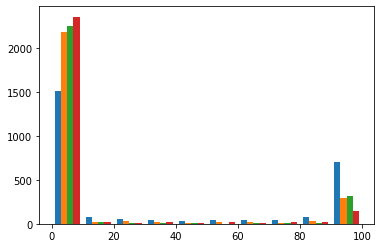

In [6]:
import matplotlib.pyplot as plt
import numpy as np

pct_rust_array = [stats['rustBytePct'] for stats in all_stats]
pct_js_array = [stats['javascriptBytePct'] for stats in all_stats]
pct_markdown_array = [stats['markdownBytePct'] for stats in all_stats]
pct_json_array = [stats['jsonBytePct'] for stats in all_stats]

plt.hist([np.array(pct_rust_array),
          np.array(pct_js_array),
          np.array(pct_markdown_array),
          np.array(pct_json_array)], 10)
plt.show()


### finding bulk commits
scatter plot of various against totalBytes

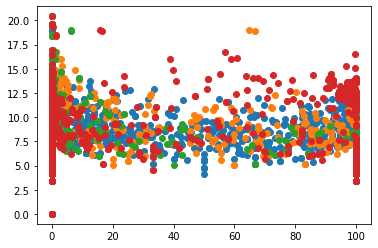

In [7]:
import matplotlib.pyplot as plt
import numpy as np

total_bytes_array = [np.log1p(stats['totalBytes']) for stats in all_stats]
plt.scatter(pct_rust_array, total_bytes_array)
plt.scatter(pct_js_array, total_bytes_array)
plt.scatter(pct_markdown_array, total_bytes_array)
plt.scatter(pct_json_array, total_bytes_array)
plt.show()

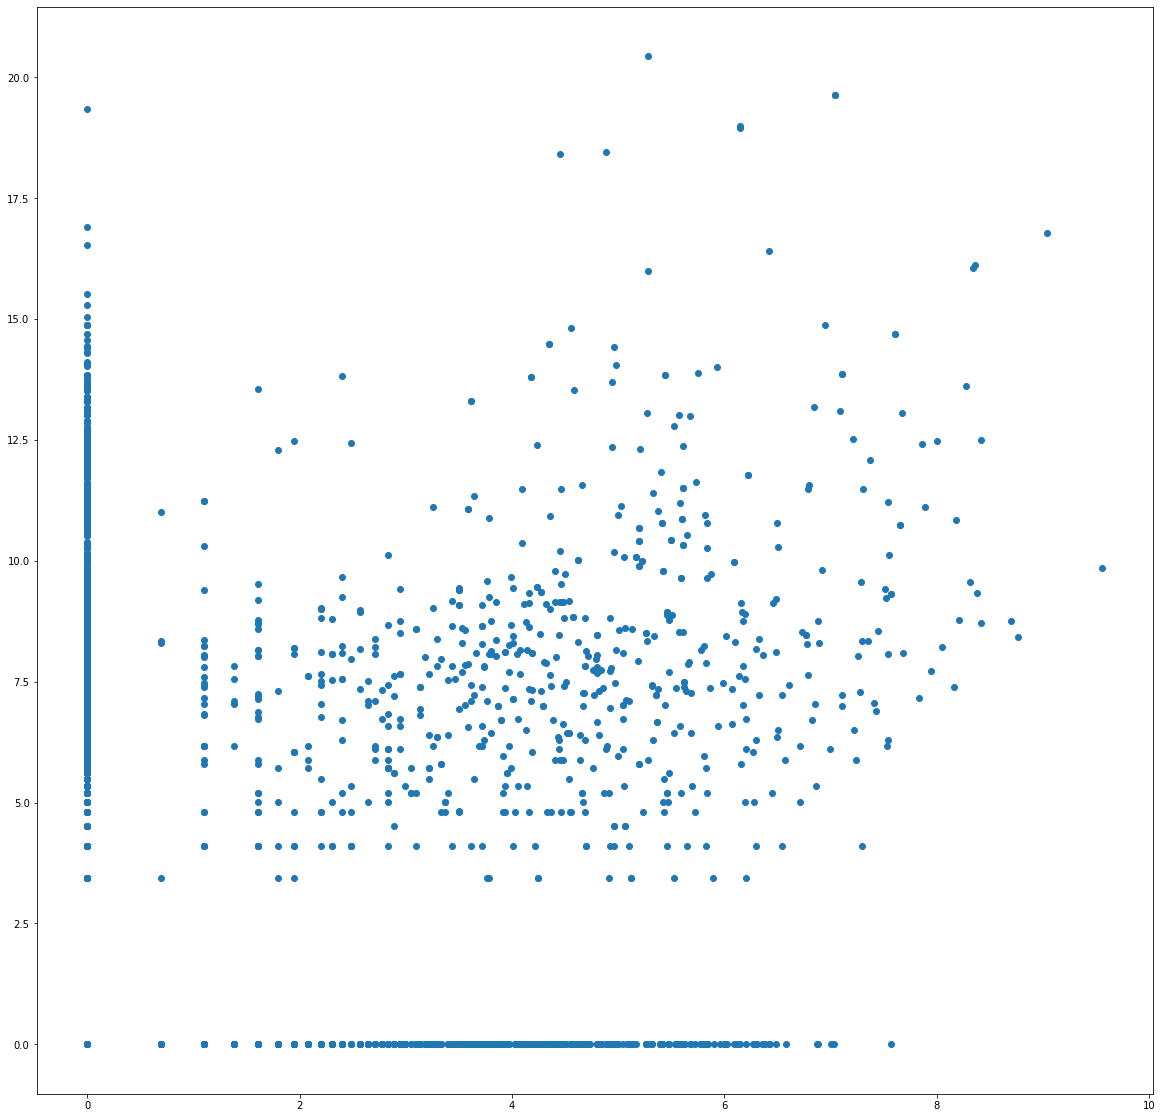

In [8]:
net_bytes_array = [np.log1p(stats['totalBytes'] - (30 * stats['rustLines'])) for stats in all_stats]

rust_array = [np.log1p(stats['rustLines']) for stats in all_stats]
js_array = [np.log1p(stats['javascriptLines']) for stats in all_stats]
markdown_array = [np.log1p(stats['markdownLines']) for stats in all_stats]
json_array = [np.log1p(stats['jsonLines']) for stats in all_stats]

fig, axs = plt.subplots(1, 1, figsize=(20,20))
axs.scatter(rust_array, net_bytes_array)
#plt.scatter(js_array, total_bytes_array)
#plt.scatter(markdown_array, total_bytes_array)
#plt.scatter(json_array, total_bytes_array)
plt.show()

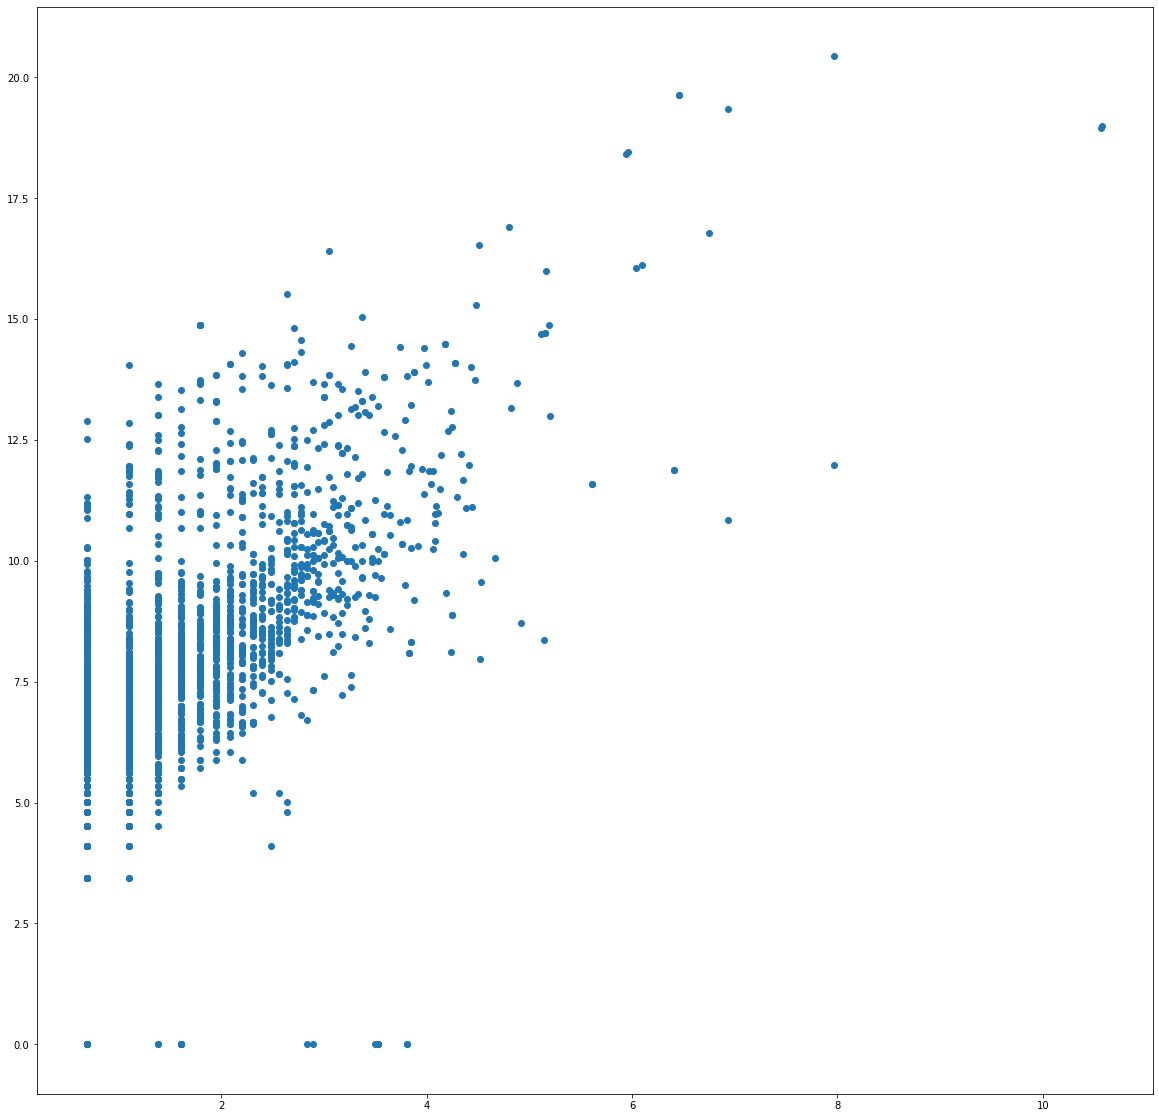

In [9]:
#net_bytes_array = [np.log1p(stats['totalBytes'] - (30 * stats['rustLines'])) for stats in all_stats]
net_bytes_array = [np.log1p(stats['totalBytes']) for stats in all_stats]
total_files = [np.log1p(stats['totalFiles']) for stats in all_stats]
line_bytes_array = [np.log1p((stats['rustLines']+1)*(stats['javascriptLines']+1)) for stats in all_stats]

rust_array = [np.log1p(stats['rustLines']) for stats in all_stats]
js_array = [np.log1p(stats['javascriptLines']) for stats in all_stats]
markdown_array = [np.log1p(stats['markdownLines']) for stats in all_stats]
json_array = [np.log1p(stats['jsonLines']) for stats in all_stats]

fig, axs = plt.subplots(1, 1, figsize=(20,20))
axs.scatter(total_files, net_bytes_array)
#plt.scatter(js_array, total_bytes_array)
#plt.scatter(markdown_array, total_bytes_array)
#plt.scatter(json_array, total_bytes_array)
plt.show()

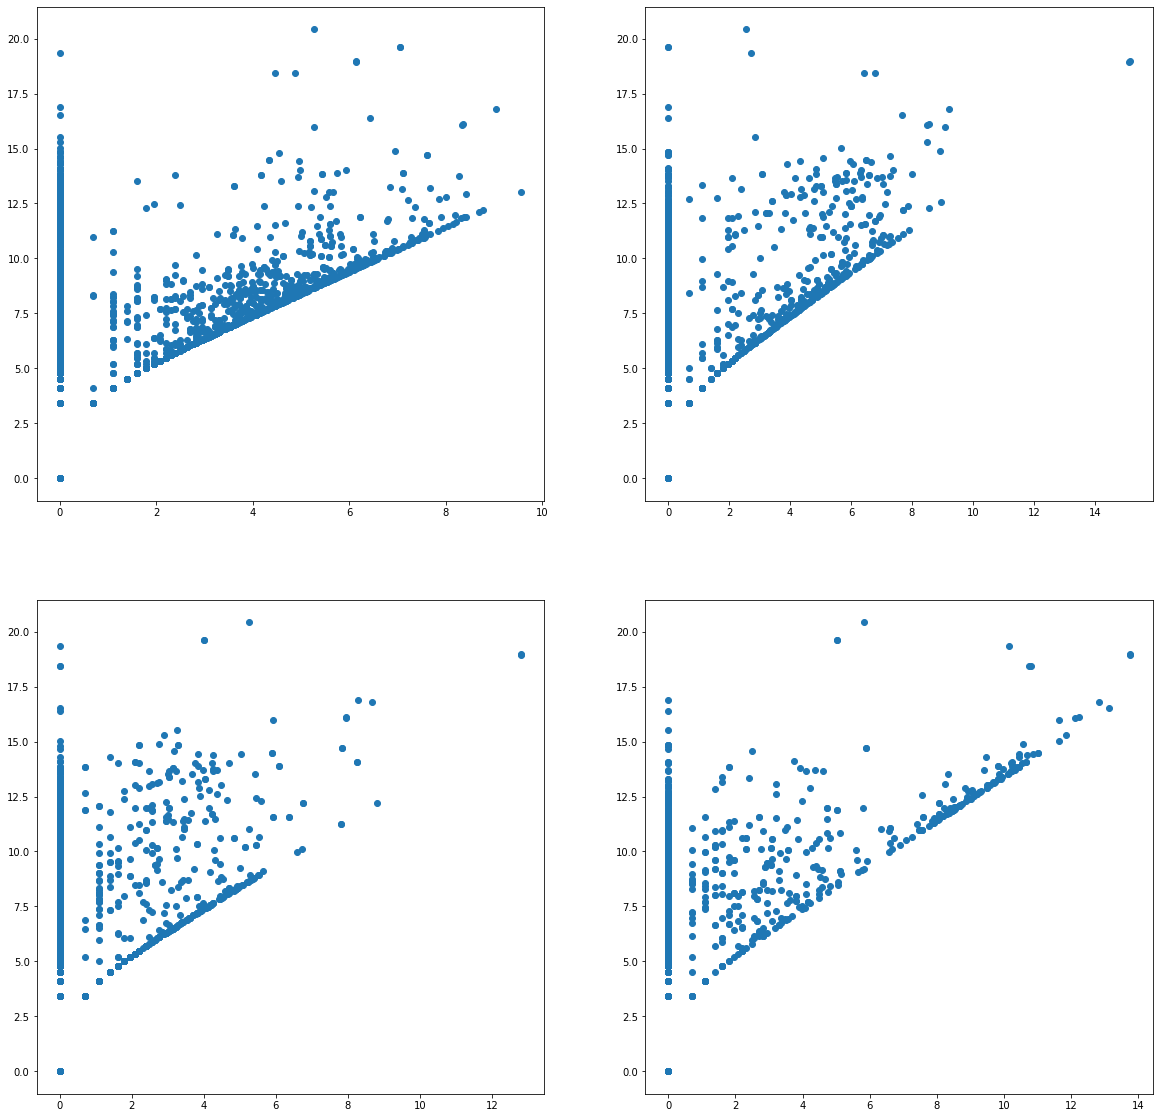

In [10]:
rust_array = [np.log1p(stats['rustLines']) for stats in all_stats]
js_array = [np.log1p(stats['javascriptLines']) for stats in all_stats]
markdown_array = [np.log1p(stats['markdownLines']) for stats in all_stats]
json_array = [np.log1p(stats['jsonLines']) for stats in all_stats]

fig, axs = plt.subplots(2, 2, figsize=(20,20))
axs[0,0].scatter(rust_array, total_bytes_array)
axs[0,1].scatter(js_array, total_bytes_array)
axs[1,0].scatter(markdown_array, total_bytes_array)
axs[1,1].scatter(json_array, total_bytes_array)
plt.show()

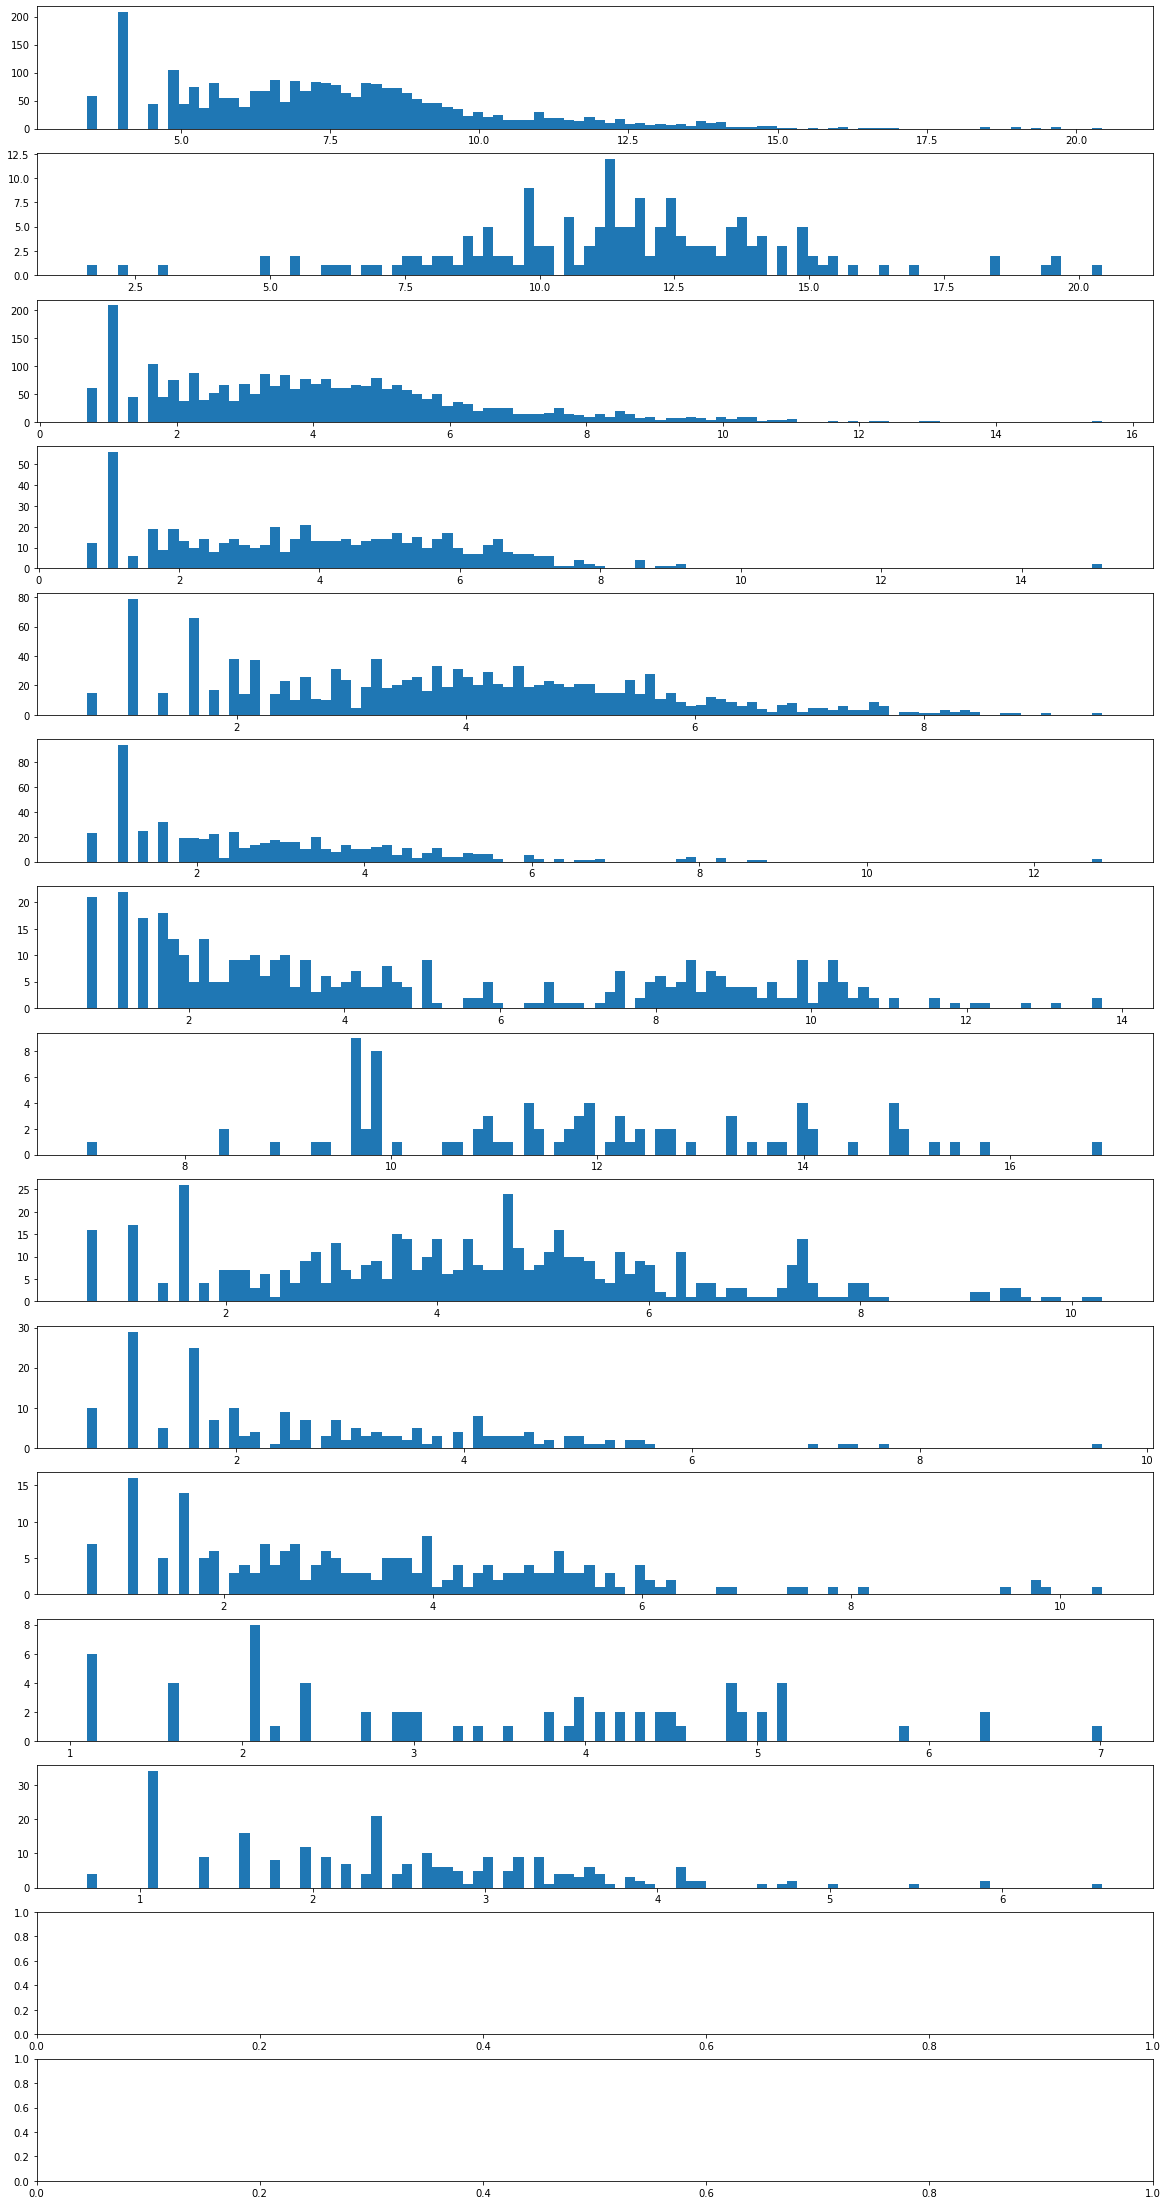

In [11]:
def log1p_stat_array(stats_set, stat_name):
    return [np.log1p(stats[stat_name]) for stats in stats_set if stats[stat_name] > 0]

def hist_me_with_your_best_shot(axis, stats_set, stat_name):
    axis.hist(log1p_stat_array(stats_set, stat_name), 100)

bytes_array = log1p_stat_array(all_stats, 'totalBytes')
binbytes_array = log1p_stat_array(all_stats, 'binBytes')
textlines_array = log1p_stat_array(all_stats, 'textLines')
jslines_array = log1p_stat_array(all_stats, 'javascriptLines')
rustlines_array = log1p_stat_array(all_stats, 'rustLines')
markdownlines_array = log1p_stat_array(all_stats, 'markdownLines')
jsonlines_array = log1p_stat_array(all_stats, 'jsonLines')

fig, axs = plt.subplots(15, 1, figsize=(20,40))
hist_me_with_your_best_shot(axs[0], all_stats, 'totalBytes')
hist_me_with_your_best_shot(axs[1], all_stats, 'binBytes')
hist_me_with_your_best_shot(axs[2], all_stats, 'textLines')
hist_me_with_your_best_shot(axs[3], all_stats, 'javascriptLines')
hist_me_with_your_best_shot(axs[4], all_stats, 'rustLines')
hist_me_with_your_best_shot(axs[5], all_stats, 'markdownLines')
hist_me_with_your_best_shot(axs[6], all_stats, 'jsonLines')
hist_me_with_your_best_shot(axs[7], all_stats, 'imgBytes')
hist_me_with_your_best_shot(axs[8], all_stats, 'lockLines')
hist_me_with_your_best_shot(axs[9], all_stats, 'yarnLines')
hist_me_with_your_best_shot(axs[10], all_stats, 'htmlLines')
hist_me_with_your_best_shot(axs[11], all_stats, 'clojureLines')
hist_me_with_your_best_shot(axs[12], all_stats, 'shellLines')
plt.show()